<a href="https://colab.research.google.com/github/Kathryn-Hise/Physics-Articles-ML/blob/main/4_Loop_of_SVM_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.svm import SVC
import io
import joblib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving metadata_and_tfidf_4.csv to metadata_and_tfidf_4.csv


In [ ]:
#filename = 'only_tfidf.csv'
#filename = 'Metadata Reformatted & Validated - Sheet1 (1).csv'
#filename = 'merged_table_better.csv'
filename = 'metadata_and_tfidf_4.csv'
f = pd.read_csv(io.BytesIO(uploaded[filename]),encoding='unicode_escape')
# Dataset is now stored in a Pandas Dataframe

# Processing Array

In [ ]:
#display(f)

In [ ]:
#remove NaN values
f = f.dropna()

#turn into a numpy array
arr = f.to_numpy()
arr = np.delete(arr, 0, 0)
indexmark = len(arr[1])

In [ ]:
#change into feature categories
Y = arr[:,2]
Y = Y.astype(int)
#print(Y)
X = arr[:,-(indexmark - 3):]
X = X.astype(float)
#print(X)
#print(type(X[1][1]))

# Loop

<Figure size 640x480 with 0 Axes>

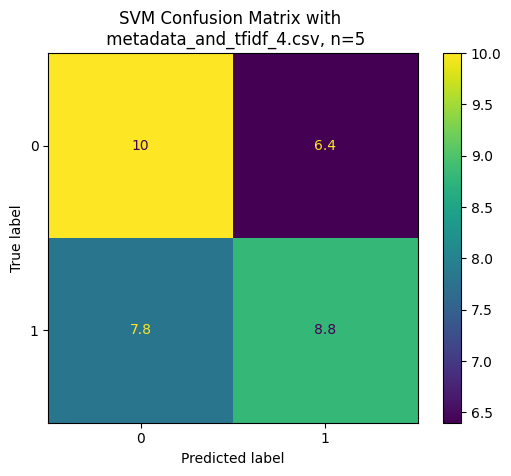

0.5696969696969697


In [ ]:
loopcount = 5
cnf_matrix = [[0,0],[0,0]]
cnf_sum = [[0,0],[0,0]]
for kjh in range(0,loopcount):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
  separator = SVC()
  separator.fit(X_train, Y_train)

  cnf_matrix = confusion_matrix(Y_test, separator.predict(X_test))

  #calcuate the accuracy
  accuracy = 0
  for j in range(len(cnf_matrix)):
      accuracy += cnf_matrix[j][j]

  #print("Accuracy:",accuracy/len(Y_test))

  #ordered confusion matrix
  #print(separator.classes_)
  #print(confusion_matrix(Y_test, separator.predict(X_test)))

  #Revisit plotting later

  #Using Linear Kernel
  svmlinear = SVC(kernel='linear', C=1.0)
  svmlinear.fit(X_train, Y_train)
  cnf_matrix = confusion_matrix(Y_test, svmlinear.predict(X_test))
  accuracy = 0
  for j in range(len(cnf_matrix)):
      accuracy += cnf_matrix[j][j]
  #print("Accuracy:",accuracy/len(Y_test))
  #Using Polynomial Kernel
  svmpoly = SVC(kernel='poly', C=1.0, degree = 2)
  svmpoly.fit(X_train, Y_train)
  cnf_matrix = confusion_matrix(Y_test, svmpoly.predict(X_test))
  accuracy = 0
  for j in range(len(cnf_matrix)):
      accuracy += cnf_matrix[j][j]
  #print("Accuracy:",accuracy/len(Y_test))
  #Using Sigmoid Kernel
  svmsig = SVC(kernel='sigmoid', C=1.0)
  svmsig.fit(X_train, Y_train)
  cnf_matrix = confusion_matrix(Y_test, svmsig.predict(X_test))
  accuracy = 0
  for j in range(len(cnf_matrix)):
      accuracy += cnf_matrix[j][j]
  #print("Accuracy:",accuracy/len(Y_test))
  """
  #Prediction with probability
  print(naiveb.predict_proba(X_test))
  """
  cnf_sum = cnf_sum + cnf_matrix

cnf_sum = cnf_sum / loopcount
plt.figure()
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_sum)
disp.plot()
plt.title(f"SVM Confusion Matrix with \n {filename}, n={loopcount}")
plt.show()

print((cnf_sum[0,0]+cnf_sum[1,1]) / (cnf_sum[0,0]+cnf_sum[1,0]+cnf_sum[0,1]+cnf_sum[1,1]) )

# Training with SVM

In [ ]:
#split the data into a 80/20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#print(type(X_train[1][4])) #check that its int

In [ ]:
#default rbf kernel
separator = SVC()
separator.fit(X_train, Y_train)

cnf_matrix = confusion_matrix(Y_test, separator.predict(X_test))

#calcuate the accuracy
accuracy = 0
for j in range(len(cnf_matrix)):
    accuracy += cnf_matrix[j][j]

print("Accuracy:",accuracy/len(Y_test))

#ordered confusion matrix
print(separator.classes_)
print(confusion_matrix(Y_test, separator.predict(X_test)))

#Revisit plotting later

#Using Linear Kernel
svmlinear = SVC(kernel='linear', C=1.0)
svmlinear.fit(X_train, Y_train)
cnf_matrix = confusion_matrix(Y_test, svmlinear.predict(X_test))
accuracy = 0
for j in range(len(cnf_matrix)):
    accuracy += cnf_matrix[j][j]
print("Accuracy:",accuracy/len(Y_test))
#Using Polynomial Kernel
svmpoly = SVC(kernel='poly', C=1.0, degree = 2)
svmpoly.fit(X_train, Y_train)
cnf_matrix = confusion_matrix(Y_test, svmpoly.predict(X_test))
accuracy = 0
for j in range(len(cnf_matrix)):
    accuracy += cnf_matrix[j][j]
print("Accuracy:",accuracy/len(Y_test))
#Using Sigmoid Kernel
svmsig = SVC(kernel='sigmoid', C=1.0)
svmsig.fit(X_train, Y_train)
cnf_matrix = confusion_matrix(Y_test, svmsig.predict(X_test))
accuracy = 0
for j in range(len(cnf_matrix)):
    accuracy += cnf_matrix[j][j]
print("Accuracy:",accuracy/len(Y_test))
"""
#Prediction with probability
print(naiveb.predict_proba(X_test))
"""

Accuracy: 0.7575757575757576
[0 1]
[[10  6]
 [ 2 15]]
Accuracy: 0.48484848484848486
Accuracy: 0.6363636363636364
Accuracy: 0.696969696969697


'\n#Prediction with probability\nprint(naiveb.predict_proba(X_test))\n'

In [ ]:
#Saving the model for future uses
import joblib
joblib.dump(svmsig,'svmsig.pkl')

#Re-use the model
clf = joblib.load('svmsig.pkl')
print(clf.predict(X_test))

[1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1]


<Figure size 640x480 with 0 Axes>

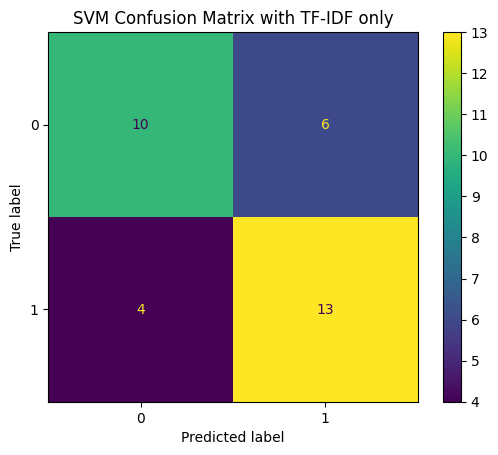

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
predictions = clf.predict(X_test)
#cm = confusion_matrix(Y_test, predictions)#, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix)
#print(neigh.predict_proba([[0.9]]))
#cm.stats() #return oredered Dictionary
#cm.stats()['overall']['Accuracy']
disp.plot()
plt.title("SVM Confusion Matrix with TF-IDF only")
plt.show()